### <a href="https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/all.zip">Dataset</a>

## Load dataset

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
os.environ["SM_FRAMEWORK"] = "tf.keras"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from tensorflow import keras
import segmentation_models as sm
# import keras
# import segmentation_models as sm
# if you get an errror: module 'keras.utils.generic_utils' has no attribute 'get_custom_objects'
# open keras.py and change all 'init_keras_custom_objects' to 'init_tfkeras_custom_objects'

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from preprocess import train_val_test_split
from sklearn.metrics import classification_report
sys.path.append('../')
from load_images import load

In [2]:
img_size = (512, 512)
X, y, _ = load(img_size)

## Preprocessing + creating generators

In [3]:
batch_size = 2

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y, train_size=7/9)

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

35 5 5


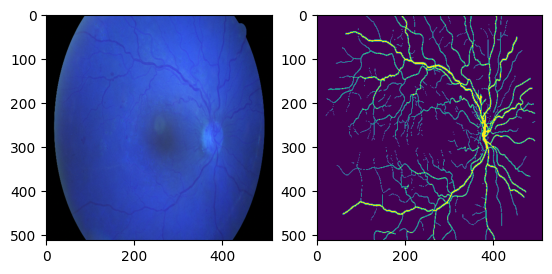

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(train_generator[1][0][0], cmap='gray')
ax[1].imshow(train_generator[1][1][0])
plt.show()

## Plot callback

In [6]:
class PlotCallback(Callback):
    def __init__(self, val_generator, num_epochs=1):
        super(PlotCallback, self).__init__()
        self.val_generator = val_generator
        self.num_epochs = num_epochs

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.num_epochs == 0:
            val_images, val_masks = next(iter(self.val_generator))
            predicted_masks = self.model.predict(val_images)
            
            fig, ax = plt.subplots(1, 3, figsize=(8, 4))
            
            ax[0].imshow(val_images[0][:,:,1])
            ax[0].set_title("Original")

            ax[1].imshow(val_masks[0])
            ax[1].set_title("Ground Truth")

            ax[2].imshow(predicted_masks[0])
            ax[2].set_title("Predicted")

            plt.show()
            

## Training

Epoch 1/300


2023-05-28 18:44:46.515510: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


14/18 [======================>.......] - ETA: 0s - loss: 0.7608 - accuracy: 0.5102

2023-05-28 18:44:50.025781: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-28 18:44:51.884557: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


18/18 [==============================] - 14s 597ms/step - loss: 0.7419 - accuracy: 0.5349 - val_loss: 1.0206 - val_accuracy: 0.1659
Epoch 2/300
18/18 [==============================] - 4s 232ms/step - loss: 0.5845 - accuracy: 0.7565 - val_loss: 0.9579 - val_accuracy: 0.1018
Epoch 3/300
18/18 [==============================] - 4s 233ms/step - loss: 0.4917 - accuracy: 0.8640 - val_loss: 0.8510 - val_accuracy: 0.1235
Epoch 4/300
18/18 [==============================] - 4s 234ms/step - loss: 0.4318 - accuracy: 0.9074 - val_loss: 0.7011 - val_accuracy: 0.4459
Epoch 5/300
18/18 [==============================] - 4s 232ms/step - loss: 0.3863 - accuracy: 0.9264 - val_loss: 0.5566 - val_accuracy: 0.9048
Epoch 6/300
18/18 [==============================] - 4s 234ms/step - loss: 0.3492 - accuracy: 0.9399 - val_loss: 0.4555 - val_accuracy: 0.9276
Epoch 7/300
1/1 [==============================] - 1s 808ms/steposs: 0.3209 - accuracy: 0.94


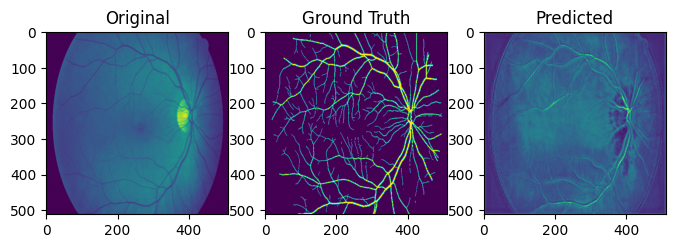

18/18 [==============================] - 5s 304ms/step - loss: 0.3209 - accuracy: 0.9458 - val_loss: 0.4153 - val_accuracy: 0.9279
Epoch 8/300
18/18 [==============================] - 4s 234ms/step - loss: 0.2991 - accuracy: 0.9499 - val_loss: 0.3870 - val_accuracy: 0.9184
Epoch 9/300
18/18 [==============================] - 4s 252ms/step - loss: 0.2810 - accuracy: 0.9523 - val_loss: 0.3672 - val_accuracy: 0.9234
Epoch 10/300
18/18 [==============================] - 4s 242ms/step - loss: 0.2657 - accuracy: 0.9546 - val_loss: 0.3443 - val_accuracy: 0.9158
Epoch 11/300
18/18 [==============================] - 4s 246ms/step - loss: 0.2528 - accuracy: 0.9559 - val_loss: 0.3327 - val_accuracy: 0.9218
Epoch 12/300
18/18 [==============================] - 3s 193ms/step - loss: 0.2405 - accuracy: 0.9572 - val_loss: 0.3378 - val_accuracy: 0.9081
Epoch 13/300
18/18 [==============================] - 4s 243ms/step - loss: 0.2307 - accuracy: 0.9580 - val_loss: 0.2938 - val_accuracy: 0.9335
Epoch 1

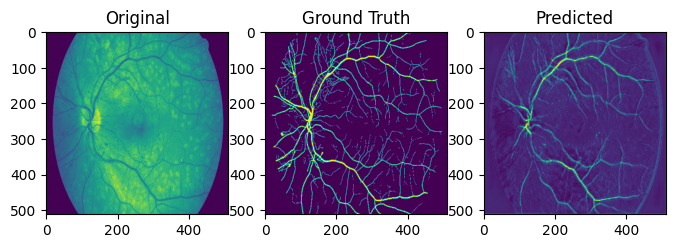

18/18 [==============================] - 4s 210ms/step - loss: 0.2208 - accuracy: 0.9591 - val_loss: 0.3770 - val_accuracy: 0.8627
Epoch 15/300
18/18 [==============================] - 4s 246ms/step - loss: 0.2123 - accuracy: 0.9597 - val_loss: 0.2608 - val_accuracy: 0.9371
Epoch 16/300
18/18 [==============================] - 4s 243ms/step - loss: 0.2054 - accuracy: 0.9602 - val_loss: 0.2515 - val_accuracy: 0.9396
Epoch 17/300
18/18 [==============================] - 4s 247ms/step - loss: 0.1981 - accuracy: 0.9607 - val_loss: 0.2397 - val_accuracy: 0.9418
Epoch 18/300
18/18 [==============================] - 4s 247ms/step - loss: 0.1912 - accuracy: 0.9615 - val_loss: 0.2320 - val_accuracy: 0.9437
Epoch 19/300
18/18 [==============================] - 4s 253ms/step - loss: 0.1847 - accuracy: 0.9621 - val_loss: 0.2265 - val_accuracy: 0.9461
Epoch 20/300
18/18 [==============================] - 5s 275ms/step - loss: 0.1795 - accuracy: 0.9624 - val_loss: 0.2192 - val_accuracy: 0.9478
Epoch

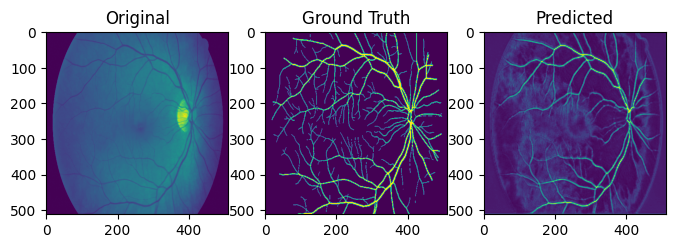

18/18 [==============================] - 5s 285ms/step - loss: 0.1741 - accuracy: 0.9631 - val_loss: 0.2085 - val_accuracy: 0.9481
Epoch 22/300
18/18 [==============================] - 5s 256ms/step - loss: 0.1695 - accuracy: 0.9634 - val_loss: 0.2000 - val_accuracy: 0.9487
Epoch 23/300
18/18 [==============================] - 5s 263ms/step - loss: 0.1650 - accuracy: 0.9636 - val_loss: 0.1937 - val_accuracy: 0.9498
Epoch 24/300
18/18 [==============================] - 5s 258ms/step - loss: 0.1602 - accuracy: 0.9641 - val_loss: 0.1884 - val_accuracy: 0.9499
Epoch 25/300
18/18 [==============================] - 4s 249ms/step - loss: 0.1568 - accuracy: 0.9641 - val_loss: 0.1850 - val_accuracy: 0.9490
Epoch 26/300
18/18 [==============================] - 4s 242ms/step - loss: 0.1525 - accuracy: 0.9644 - val_loss: 0.1803 - val_accuracy: 0.9501
Epoch 27/300
18/18 [==============================] - 4s 248ms/step - loss: 0.1483 - accuracy: 0.9652 - val_loss: 0.1737 - val_accuracy: 0.9514
Epoch

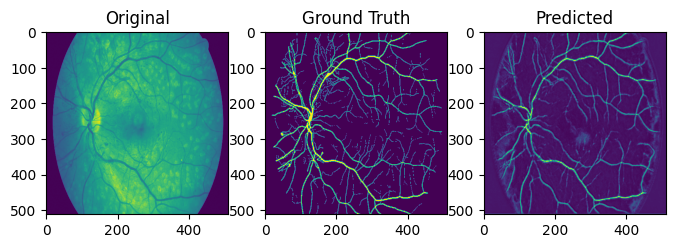

18/18 [==============================] - 5s 262ms/step - loss: 0.1447 - accuracy: 0.9653 - val_loss: 0.1694 - val_accuracy: 0.9516
Epoch 29/300
18/18 [==============================] - 4s 248ms/step - loss: 0.1420 - accuracy: 0.9652 - val_loss: 0.1651 - val_accuracy: 0.9523
Epoch 30/300
18/18 [==============================] - 4s 244ms/step - loss: 0.1387 - accuracy: 0.9655 - val_loss: 0.1583 - val_accuracy: 0.9548
Epoch 31/300
18/18 [==============================] - 4s 246ms/step - loss: 0.1360 - accuracy: 0.9656 - val_loss: 0.1572 - val_accuracy: 0.9543
Epoch 32/300
18/18 [==============================] - 4s 247ms/step - loss: 0.1326 - accuracy: 0.9663 - val_loss: 0.1532 - val_accuracy: 0.9552
Epoch 33/300
18/18 [==============================] - 4s 247ms/step - loss: 0.1299 - accuracy: 0.9666 - val_loss: 0.1478 - val_accuracy: 0.9571
Epoch 34/300
18/18 [==============================] - 4s 246ms/step - loss: 0.1268 - accuracy: 0.9671 - val_loss: 0.1449 - val_accuracy: 0.9573
Epoch

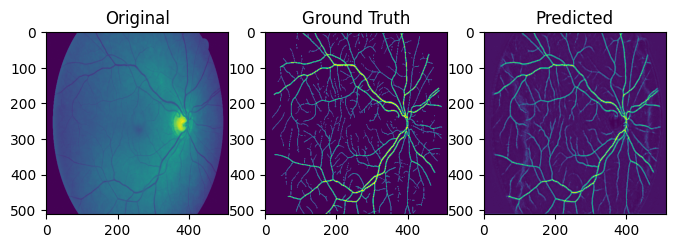

18/18 [==============================] - 5s 261ms/step - loss: 0.1247 - accuracy: 0.9673 - val_loss: 0.1426 - val_accuracy: 0.9573
Epoch 36/300
18/18 [==============================] - 4s 249ms/step - loss: 0.1228 - accuracy: 0.9672 - val_loss: 0.1370 - val_accuracy: 0.9597
Epoch 37/300
18/18 [==============================] - 3s 193ms/step - loss: 0.1200 - accuracy: 0.9679 - val_loss: 0.1371 - val_accuracy: 0.9585
Epoch 38/300
18/18 [==============================] - 4s 238ms/step - loss: 0.1184 - accuracy: 0.9678 - val_loss: 0.1344 - val_accuracy: 0.9591
Epoch 39/300
18/18 [==============================] - 4s 246ms/step - loss: 0.1159 - accuracy: 0.9683 - val_loss: 0.1313 - val_accuracy: 0.9603
Epoch 40/300
18/18 [==============================] - 4s 250ms/step - loss: 0.1146 - accuracy: 0.9681 - val_loss: 0.1312 - val_accuracy: 0.9594
Epoch 41/300
18/18 [==============================] - 4s 245ms/step - loss: 0.1127 - accuracy: 0.9685 - val_loss: 0.1279 - val_accuracy: 0.9606
Epoch

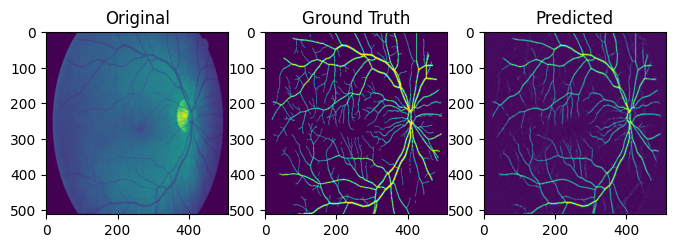

18/18 [==============================] - 5s 261ms/step - loss: 0.1107 - accuracy: 0.9687 - val_loss: 0.1269 - val_accuracy: 0.9606
Epoch 43/300
18/18 [==============================] - 4s 246ms/step - loss: 0.1094 - accuracy: 0.9687 - val_loss: 0.1261 - val_accuracy: 0.9605
Epoch 44/300
18/18 [==============================] - 4s 249ms/step - loss: 0.1073 - accuracy: 0.9694 - val_loss: 0.1245 - val_accuracy: 0.9607
Epoch 45/300
18/18 [==============================] - 4s 244ms/step - loss: 0.1061 - accuracy: 0.9693 - val_loss: 0.1213 - val_accuracy: 0.9619
Epoch 46/300
18/18 [==============================] - 3s 193ms/step - loss: 0.1052 - accuracy: 0.9696 - val_loss: 0.1249 - val_accuracy: 0.9594
Epoch 47/300
18/18 [==============================] - 3s 193ms/step - loss: 0.1046 - accuracy: 0.9691 - val_loss: 0.1227 - val_accuracy: 0.9607
Epoch 48/300
18/18 [==============================] - 4s 247ms/step - loss: 0.1025 - accuracy: 0.9697 - val_loss: 0.1199 - val_accuracy: 0.9617
Epoch

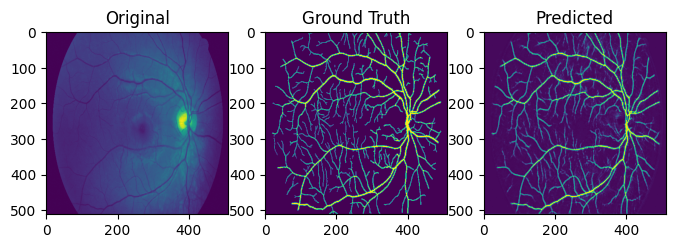

18/18 [==============================] - 5s 260ms/step - loss: 0.1010 - accuracy: 0.9698 - val_loss: 0.1192 - val_accuracy: 0.9616
Epoch 50/300
18/18 [==============================] - 4s 251ms/step - loss: 0.0996 - accuracy: 0.9702 - val_loss: 0.1173 - val_accuracy: 0.9622
Epoch 51/300
18/18 [==============================] - 4s 245ms/step - loss: 0.0980 - accuracy: 0.9705 - val_loss: 0.1166 - val_accuracy: 0.9620
Epoch 52/300
18/18 [==============================] - 4s 246ms/step - loss: 0.0968 - accuracy: 0.9707 - val_loss: 0.1145 - val_accuracy: 0.9629
Epoch 53/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0955 - accuracy: 0.9709 - val_loss: 0.1154 - val_accuracy: 0.9620
Epoch 54/300
18/18 [==============================] - 3s 192ms/step - loss: 0.0942 - accuracy: 0.9712 - val_loss: 0.1157 - val_accuracy: 0.9617
Epoch 55/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0928 - accuracy: 0.9715 - val_loss: 0.1161 - val_accuracy: 0.9610
Epoch

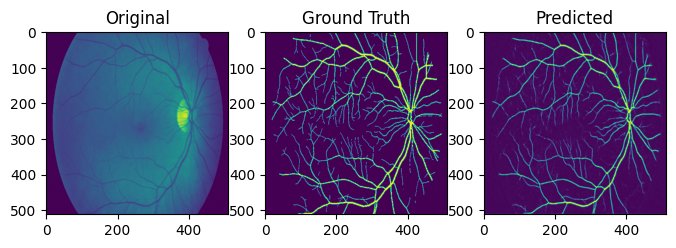

18/18 [==============================] - 4s 210ms/step - loss: 0.0924 - accuracy: 0.9714 - val_loss: 0.1150 - val_accuracy: 0.9613
Epoch 57/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0906 - accuracy: 0.9719 - val_loss: 0.1152 - val_accuracy: 0.9611
Epoch 58/300
18/18 [==============================] - 4s 246ms/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.1117 - val_accuracy: 0.9627
Epoch 59/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0882 - accuracy: 0.9724 - val_loss: 0.1133 - val_accuracy: 0.9617
Epoch 60/300
18/18 [==============================] - 4s 248ms/step - loss: 0.0878 - accuracy: 0.9723 - val_loss: 0.1105 - val_accuracy: 0.9628
Epoch 61/300
18/18 [==============================] - 3s 194ms/step - loss: 0.0866 - accuracy: 0.9726 - val_loss: 0.1117 - val_accuracy: 0.9623
Epoch 62/300
18/18 [==============================] - 3s 194ms/step - loss: 0.0856 - accuracy: 0.9728 - val_loss: 0.1107 - val_accuracy: 0.9624
Epoch

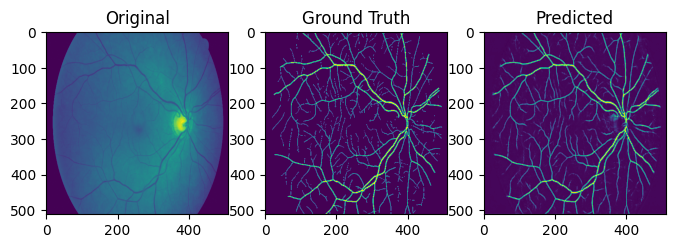

18/18 [==============================] - 4s 223ms/step - loss: 0.0843 - accuracy: 0.9732 - val_loss: 0.1116 - val_accuracy: 0.9620
Epoch 64/300
18/18 [==============================] - 4s 248ms/step - loss: 0.0830 - accuracy: 0.9735 - val_loss: 0.1104 - val_accuracy: 0.9623
Epoch 65/300
18/18 [==============================] - 4s 245ms/step - loss: 0.0827 - accuracy: 0.9735 - val_loss: 0.1084 - val_accuracy: 0.9630
Epoch 66/300
18/18 [==============================] - 4s 248ms/step - loss: 0.0818 - accuracy: 0.9735 - val_loss: 0.1077 - val_accuracy: 0.9633
Epoch 67/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0809 - accuracy: 0.9737 - val_loss: 0.1080 - val_accuracy: 0.9630
Epoch 68/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0797 - accuracy: 0.9742 - val_loss: 0.1084 - val_accuracy: 0.9630
Epoch 69/300
18/18 [==============================] - 3s 194ms/step - loss: 0.0800 - accuracy: 0.9736 - val_loss: 0.1078 - val_accuracy: 0.9629
Epoch

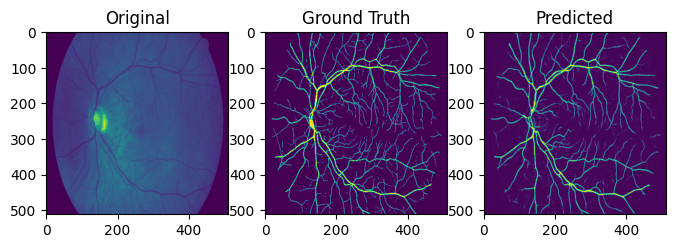

18/18 [==============================] - 5s 262ms/step - loss: 0.0786 - accuracy: 0.9741 - val_loss: 0.1076 - val_accuracy: 0.9630
Epoch 71/300
18/18 [==============================] - 4s 249ms/step - loss: 0.0769 - accuracy: 0.9747 - val_loss: 0.1062 - val_accuracy: 0.9635
Epoch 72/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0757 - accuracy: 0.9751 - val_loss: 0.1065 - val_accuracy: 0.9634
Epoch 73/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0754 - accuracy: 0.9751 - val_loss: 0.1079 - val_accuracy: 0.9629
Epoch 74/300
18/18 [==============================] - 4s 248ms/step - loss: 0.0740 - accuracy: 0.9755 - val_loss: 0.1055 - val_accuracy: 0.9637
Epoch 75/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0739 - accuracy: 0.9754 - val_loss: 0.1060 - val_accuracy: 0.9635
Epoch 76/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0733 - accuracy: 0.9754 - val_loss: 0.1085 - val_accuracy: 0.9625
Epoch

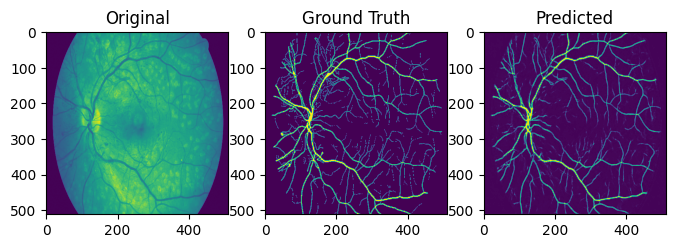

18/18 [==============================] - 4s 210ms/step - loss: 0.0723 - accuracy: 0.9759 - val_loss: 0.1071 - val_accuracy: 0.9631
Epoch 78/300
18/18 [==============================] - 4s 248ms/step - loss: 0.0715 - accuracy: 0.9761 - val_loss: 0.1052 - val_accuracy: 0.9636
Epoch 79/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0705 - accuracy: 0.9764 - val_loss: 0.1080 - val_accuracy: 0.9629
Epoch 80/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0695 - accuracy: 0.9767 - val_loss: 0.1076 - val_accuracy: 0.9628
Epoch 81/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0701 - accuracy: 0.9762 - val_loss: 0.1057 - val_accuracy: 0.9634
Epoch 82/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0693 - accuracy: 0.9766 - val_loss: 0.1055 - val_accuracy: 0.9636
Epoch 83/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0685 - accuracy: 0.9767 - val_loss: 0.1063 - val_accuracy: 0.9633
Epoch

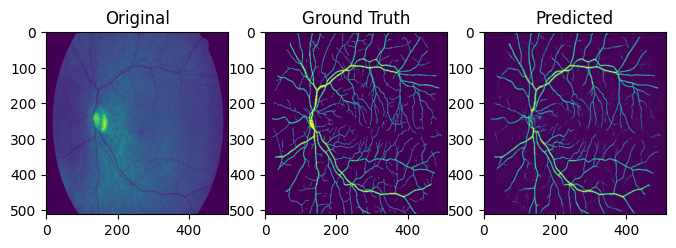

18/18 [==============================] - 4s 210ms/step - loss: 0.0686 - accuracy: 0.9764 - val_loss: 0.1077 - val_accuracy: 0.9630
Epoch 85/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0668 - accuracy: 0.9773 - val_loss: 0.1071 - val_accuracy: 0.9630
Epoch 86/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0660 - accuracy: 0.9776 - val_loss: 0.1063 - val_accuracy: 0.9634
Epoch 87/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0651 - accuracy: 0.9779 - val_loss: 0.1062 - val_accuracy: 0.9633
Epoch 88/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0646 - accuracy: 0.9779 - val_loss: 0.1065 - val_accuracy: 0.9632
Epoch 89/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0640 - accuracy: 0.9781 - val_loss: 0.1067 - val_accuracy: 0.9633
Epoch 90/300
18/18 [==============================] - 3s 193ms/step - loss: 0.0633 - accuracy: 0.9783 - val_loss: 0.1076 - val_accuracy: 0.9630


In [8]:
model = sm.Unet('efficientnetb0', classes=1, activation='sigmoid')
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# model.load_weights('unet_effnetb0.h5')

history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[PlotCallback(val_generator, num_epochs=7),
              ModelCheckpoint('unet_effnetb0.h5', save_best_only=True),
              EarlyStopping(patience=12)],
    epochs=300
)

## Results
#### Accuracy and loss during training

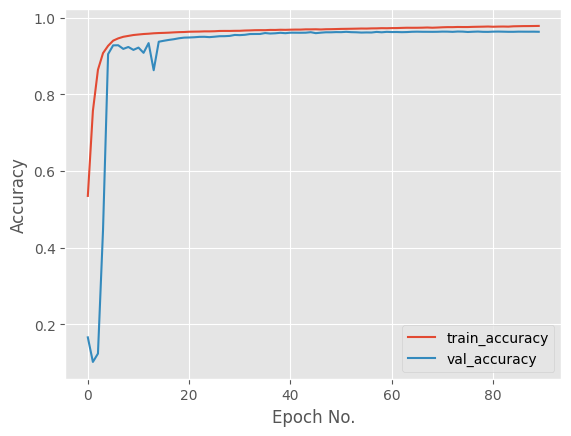

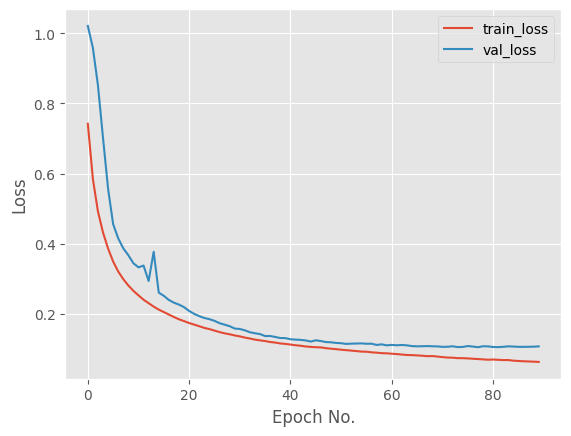

In [10]:
plt.style.use('ggplot')

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch No.')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch No.')
plt.legend()
plt.show()

#### Training on combined train and valid sets

In [14]:
X_train_val = np.concatenate([X_train, X_val], axis=0)
y_train_val = np.concatenate([y_train, y_val], axis=0)
train_val_datagen = ImageDataGenerator()
train_val_generator = train_val_datagen.flow(X_train_val, y_train_val, batch_size=batch_size)

In [15]:
keras.backend.clear_session() # free RAM
clf = sm.Unet('efficientnetb0', classes=1, activation='sigmoid')
clf.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

clf.fit(
      train_val_generator,
      callbacks=[EarlyStopping(monitor='loss', patience=5)],
      epochs=100,
      verbose=0
)

2023-05-28 18:52:29.832391: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


#### Training only on validation set

In [ ]:
keras.backend.clear_session() # free RAM
clf_val = sm.Unet('efficientnetb0', classes=1, activation='sigmoid')
clf_val.compile(optimizer=Adam(5e-1), loss='binary_crossentropy', metrics=['accuracy'])

clf_val.load_weights('unet_effnetb0_13_78.h5')

clf_val.fit(
    val_generator,
    epochs=40
)

#### Classification report on test set

In [ ]:
y_pred = clf.predict(X_test)
y_pred = y_pred.flatten()
y_test = y_test.flatten()
_, y_pred = cv2.threshold(y_pred, 0.5, 1, cv2.THRESH_BINARY)
y_pred = y_pred.astype(np.uint8)

In [8]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1211630
           1       0.78      0.79      0.78     99090

    accuracy                           0.97   1310720
   macro avg       0.88      0.88      0.88   1310720
weighted avg       0.97      0.97      0.97   1310720

